In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import os

In [5]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)


In [6]:
import seaborn as sns
from keras.applications.vgg16 import VGG16
from sklearn import preprocessing
from keras_preprocessing.image import load_img
from sklearn import preprocessing
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
from tensorflow.keras.models import load_model
from multiprocessing import Pool
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_images = [] #Train iamges array
train_labels = [] #Train labels array

In [9]:
test_images = [] #Test iamges array 
test_labels = [] #Test labels array

In [10]:
size = 224 #The resize of images
num_processes = 4  # Set the number of CPU cores to use
label_map = {"AD": 0, "MCI": 1, "LMCI": 2, "CN": 3}  # Map labels to integers

In [11]:
def train_process_images(case_dir):
    images = []
    label = os.path.basename(os.path.dirname(case_dir))
    label_idx = label_map[label]
    for img_path in glob.glob(os.path.join(case_dir, "*.jpg")):
        print("Processing image:", img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (size, size))
        images.append(img)
    return images, label_idx

In [12]:
pool = Pool(processes=num_processes)
results = pool.map(train_process_images, glob.glob("/content/drive/MyDrive/output_images_preprocessed/train/*/*"))
pool.close()
pool.join()

for images, label_idx in results:
    train_images.extend(images)
    train_labels.extend([label_idx] * len(images))

train_images = np.array(train_images)
train_labels = np.array(train_labels)

Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_006_S_4713_MR_Field_Mapping__br_raw_20120813162617198_65_S160649_I323333_brain_folder_0/slice_51.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_006_S_4713_MR_Field_Mapping__br_raw_20120813162617198_65_S160649_I323333_brain_folder_0/slice_52.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_002_S_4447_MR_Field_Mapping__br_raw_20150205120146479_149_S247814_I472275_brain_folder_0/slice_56.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_002_S_1280_MR_Field_Mapping__br_raw_20110505114926116_23_S108089_I233423_brain_folder_0/slice_52.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_002_S_4262_MR_Field_Mapping__br_raw_20121112110201536_169_S174192_I346109_brain_folder_0/slice_47.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/train/AD/ADNI_0

In [13]:
def test_process_images(case_dir):
    images = []
    label = os.path.basename(os.path.dirname(case_dir))
    label_idx = label_map[label]
    for img_path in glob.glob(os.path.join(case_dir, "*.jpg")):
        print("Processing image:", img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (size, size))
        images.append(img)
    return images, label_idx

In [14]:
pool = Pool(processes=num_processes)
results = pool.map(test_process_images, glob.glob("/content/drive/MyDrive/output_images_preprocessed/test/*/*"))
pool.close()
pool.join()

for images, label_idx in results:
    test_images.extend(images)
    test_labels.extend([label_idx] * len(images))

test_images = np.array(test_images)
test_labels = np.array(test_labels)

Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_002_S_4262_MR_Field_Mapping__br_raw_20120420102148554_37_S147985_I299156_brain_folder_0/slice_52.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_100_S_6713_MR_Axial_MB_DTI_phase_noFatSatA_br_raw_20210901155333018_1_S1058828_I1487252_brain_folder_0/slice_281.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_006_S_4713_MR_Axial_Field_Mapping__br_raw_20210823122658978_109_S1055912_I1483602_brain_folder_0/slice_56.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_002_S_4262_MR_Field_Mapping__br_raw_20120420102148554_37_S147985_I299156_brain_folder_0/slice_53.jpg
Processing image: /content/drive/MyDrive/output_images_preprocessed/test/AD/ADNI_153_S_6665_MR_Axial_DTI_FA_br_raw_20190114121528720_1_S784900_I1116077_brain_folder_0/slice_35.jpg
Processing image:Processing image: /content/drive/MyDrive/output_im

In [15]:
label_map = {"AD": 0, "MCI": 1, "LMCI": 2, "CN": 3}  # Map labels to integers

for label_dir in glob.glob("/content/drive/MyDrive/output_images_preprocessed/test/*"):
    label = os.path.basename(label_dir)
    label_idx = label_map[label]
    num_images = 0  # initialize counter for number of images in this label
    for case_dir in glob.glob(os.path.join(label_dir, "*")):
        num_images += len(glob.glob(os.path.join(case_dir, "*.jpg")))
    print(f"Label {label} has {num_images} JPG images.")

Label AD has 200 JPG images.
Label CN has 200 JPG images.
Label LMCI has 200 JPG images.
Label MCI has 200 JPG images.


In [16]:
label_map = {"AD": 0, "MCI": 1, "LMCI": 2, "CN": 3}  # Map labels to integers

for label_dir in glob.glob("/content/drive/MyDrive/output_images_preprocessed/train/*"):
    label = os.path.basename(label_dir)
    label_idx = label_map[label]
    num_images = 0  # initialize counter for number of images in this label
    for case_dir in glob.glob(os.path.join(label_dir, "*")):
        num_images += len(glob.glob(os.path.join(case_dir, "*.jpg")))
    print(f"Label {label} has {num_images} JPG images.")

Label AD has 790 JPG images.
Label CN has 800 JPG images.
Label LMCI has 780 JPG images.
Label MCI has 800 JPG images.


In [17]:
'''
Here we reassingned the variables to new names as they are more meaningful(That is not actual splitting)
The splitting was already done
'''
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

In [18]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Saved Models/InceptionV3.hdf5')

In [20]:
# from keras.applications.resnet import ResNet101

# model = ResNet101(weights='imagenet', include_top=True, input_shape=(224, 224, 3))


In [21]:
# #Flatten output layer of Resnet
# flattened = tf.keras.layers.Flatten()(model.output)

# #Fully connected layer 1
# fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

# #Fully connected layer, output layer
# fc2 = tf.keras.layers.Dense(4, activation='softmax', name="AddedDense2")(fc1)
# model = tf.keras.models.Model(inputs=model.input, outputs=fc2)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
from tensorflow import keras
import time
import matplotlib.pyplot as plt

In [25]:
plt.style.use('dark_background')
class TrainHistory(keras.callbacks.Callback):
    def __init__(self):
        super(TrainHistory, self).__init__()
        self.train_time = []
        self.train_losses = []
        self.train_accs = []
        
    def on_train_begin(self, logs=None):
        self.start_time = time.time()
        
    def on_epoch_end(self, epoch, logs=None):
        self.train_time.append(time.time() - self.start_time)
        self.train_losses.append(logs['loss'])
        self.train_accs.append(logs['accuracy'])
        
        self.plot_training_curves()
        
    def plot_training_curves(self):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_time, self.train_losses, label='train loss')
        plt.xlabel('Train time (s)')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(range(len(self.train_accs)), self.train_accs, label='train acc')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        
        plt.show()

In [26]:
train_history = TrainHistory()

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.6754

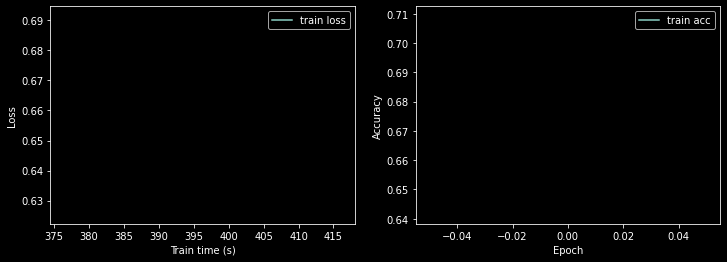

50/50 [==============================] - 396s 7s/step - loss: 0.6585 - accuracy: 0.6754
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.5974 - accuracy: 0.6836

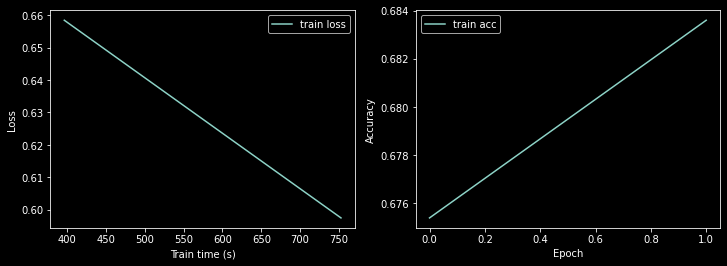

50/50 [==============================] - 356s 7s/step - loss: 0.5974 - accuracy: 0.6836
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.6968

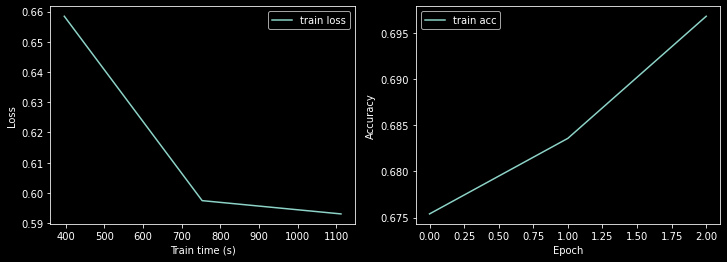

50/50 [==============================] - 359s 7s/step - loss: 0.5930 - accuracy: 0.6968
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss: 0.6037 - accuracy: 0.6978

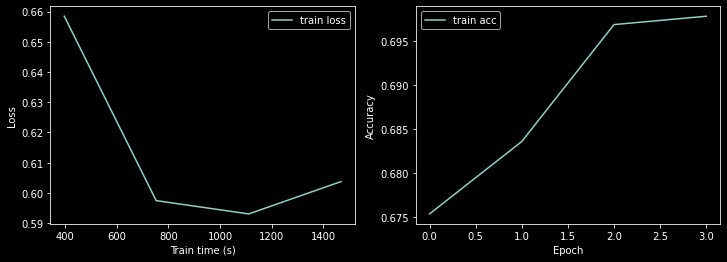

50/50 [==============================] - 358s 7s/step - loss: 0.6037 - accuracy: 0.6978
Epoch 5/10
50/50 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.6934

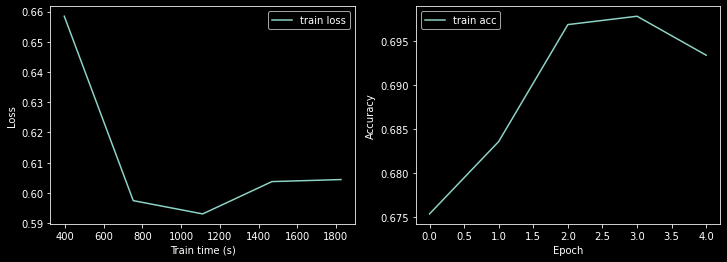

50/50 [==============================] - 357s 7s/step - loss: 0.6044 - accuracy: 0.6934
Epoch 6/10
50/50 [==============================] - ETA: 0s - loss: 0.5635 - accuracy: 0.7054

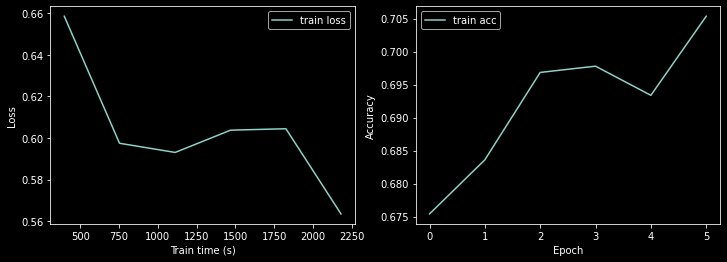

50/50 [==============================] - 355s 7s/step - loss: 0.5635 - accuracy: 0.7054
Epoch 7/10
50/50 [==============================] - ETA: 0s - loss: 0.5239 - accuracy: 0.7309

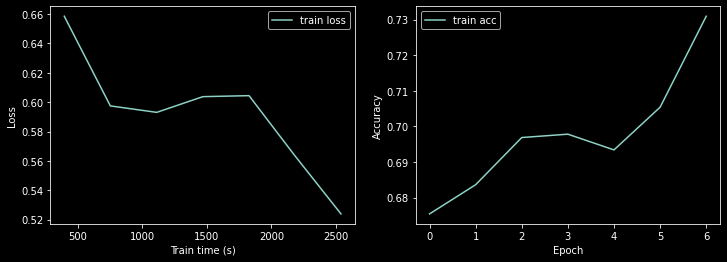

50/50 [==============================] - 357s 7s/step - loss: 0.5239 - accuracy: 0.7309
Epoch 8/10
50/50 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.7375

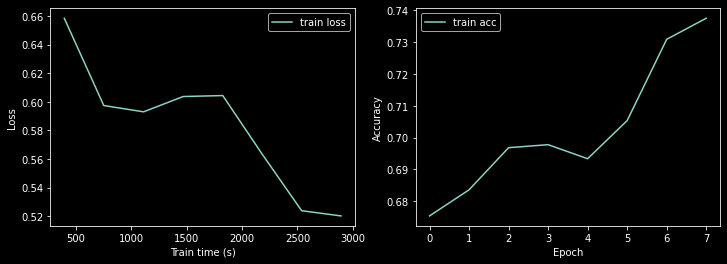

50/50 [==============================] - 355s 7s/step - loss: 0.5203 - accuracy: 0.7375
Epoch 9/10
50/50 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7265

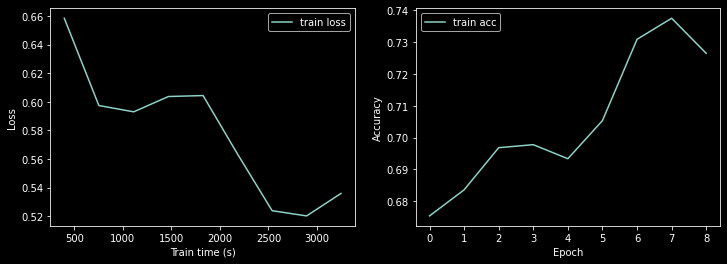

50/50 [==============================] - 354s 7s/step - loss: 0.5360 - accuracy: 0.7265
Epoch 10/10
50/50 [==============================] - ETA: 0s - loss: 0.5335 - accuracy: 0.7233

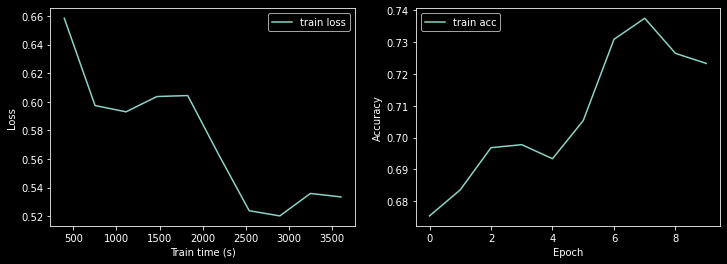

50/50 [==============================] - 354s 7s/step - loss: 0.5335 - accuracy: 0.7233


In [27]:
# Train the model with the combined data
train = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    callbacks=[train_history]
)

In [28]:
Test_loss, Test_accuracy = model.evaluate(x_test,  y_test)

25/25 [==============================] - 22s 782ms/step - loss: 1.3924 - accuracy: 0.5437


In [29]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

25/25 [==============================] - 21s 769ms/step


In [30]:
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Test Accuracy: 0.544


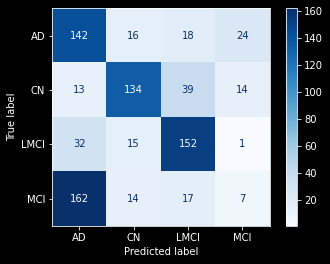

<Figure size 432x288 with 0 Axes>

In [31]:
labels = ["AD", "CN", "LMCI","MCI"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.figure()
plt.show()

In [32]:
model.save('/content/drive/MyDrive/Saved Models/InceptionV3.hdf5')